In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size']=20
#import numba

In [21]:

def RMT_Poi(N, sigma):
    H=np.zeros((N, N))
    for j in range(N):
        H[j,j]=np.random.normal(0, sigma, 1)
    return H

def RMT_GOE(N, sigma):
    H=np.zeros((N, N))
    for j in range(N):
        for k in range(j, N):
            H[j,k]=np.random.normal(0,sigma, 1)
            H[k,j]=H[j,k]
    return H

def RMT_GUE(N, sigma):
    H=np.zeros((N, N), dtype='complex')
    for j in range(N):
        H[j,j]=np.random.normal(0,sigma, 1)
        for k in range(j+1, N):
            a=np.random.normal(0,sigma, 1)/np.sqrt(2)
            b=np.random.normal(0,sigma, 1)/np.sqrt(2)
            H[j,k]=complex(a,b)
            H[k,j]=complex(a,-b)
    return H

In [30]:
N = 10
Nav=1000
i=complex(0,1)
#auxH = np.random.randn(N,N)
#H=(auxH+auxH.T)/2
#auxH=np.random.randn(N, N)+i*np.random.randn(N, N)
#H=(auxH+auxH.conj().T)/2
Elist=np.zeros((N, Nav))
for j in range(Nav):
    H=RMT_GUE(N,1/np.sqrt(2))
    E , _ = np.linalg.eigh(H)
    Elist[:,j]=E
Earr=Elist.flatten()

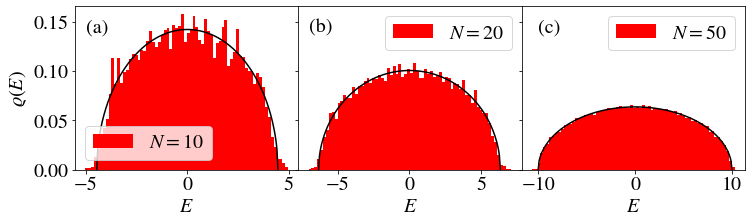

In [52]:
R=np.sqrt(2*N)
x=np.linspace(-R, R, 200)
#plt.figure()
fig, (ax1, ax2, ax3)=plt.subplots(1, 3, sharey=True, figsize=[12, 3])
ax1.hist(Earr, bins=70, density=True, color='red', label="$N=10$")
ax1.plot(x, R/np.pi*np.sqrt(1-(x/R)**2)/(R**2/2), color='black')
R=np.sqrt(2*20)
x=np.linspace(-R, R, 200)
ax2.hist(Earr20, bins=70, density=True, color='red', label="$N=20$")
ax2.plot(x, R/np.pi*np.sqrt(1-(x/R)**2)/(R**2/2), color='black')
R=np.sqrt(2*50)
x=np.linspace(-R, R, 200)
ax3.hist(Earr50, bins=70, density=True, color='red', label="$N=50$")
ax3.plot(x, R/np.pi*np.sqrt(1-(x/R)**2)/(R**2/2), color='black')
plt.subplots_adjust(wspace=0)
ax1.set_xlabel("$E$")
ax2.set_xlabel("$E$")
ax3.set_xlabel("$E$")
ax1.set_ylabel(r"$\varrho(E)$")
ax1.legend(loc="lower left")
ax1.text(-5, 0.14, "(a)")
ax2.text(-7, 0.14, "(b)")
ax3.text(-10, 0.14, "(c)")
ax2.legend()
ax3.legend()
plt.show()

In [29]:
#Earr50=Earr
#Earr20=Earr